<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Practicing loss functions and regression metrics

---



## Learning Objectives

### Core

- Know the difference between numerical and categorical predictors
- Use `pd.get_dummies` to transform categorical variables into numerical format
- Know about redundant variables

### Target

- Fit a regression model using both numerical and categorical predictors
- Interpret the model coefficients of categorical predictor variables


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Categorical-predictors" data-toc-modified-id="Categorical-predictors-2">Categorical predictors</a></span></li><li><span><a href="#Example-for-dummifying" data-toc-modified-id="Example-for-dummifying-3">Example for dummifying</a></span><ul class="toc-item"><li><span><a href="#Seaborn-tips-data" data-toc-modified-id="Seaborn-tips-data-3.1">Seaborn tips data</a></span></li><li><span><a href="#Dummify-one-column" data-toc-modified-id="Dummify-one-column-3.2">Dummify one column</a></span></li><li><span><a href="#Dummify-all-variables" data-toc-modified-id="Dummify-all-variables-3.3">Dummify all variables</a></span><ul class="toc-item"><li><span><a href="#Redundant-variables" data-toc-modified-id="Redundant-variables-3.3.1">Redundant variables</a></span></li></ul></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.4">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Choose-outcome-and-predictor-variables" data-toc-modified-id="Choose-outcome-and-predictor-variables-3.4.1">Choose outcome and predictor variables</a></span></li><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.4.2">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.4.3">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.4.4">Linear regression model</a></span></li><li><span><a href="#Lasso-model" data-toc-modified-id="Lasso-model-3.4.5">Lasso model</a></span></li></ul></li><li><span><a href="#Drop-redundant-variables" data-toc-modified-id="Drop-redundant-variables-3.5">Drop redundant variables</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.6">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.6.1">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.6.2">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.6.3">Linear regression model</a></span></li><li><span><a href="#Lasso-model" data-toc-modified-id="Lasso-model-3.6.4">Lasso model</a></span></li></ul></li><li><span><a href="#Interpret-the-model-coefficients-of-dummy-variables" data-toc-modified-id="Interpret-the-model-coefficients-of-dummy-variables-3.7">Interpret the model coefficients of dummy variables</a></span></li></ul></li><li><span><a href="#Dummy-practice" data-toc-modified-id="Dummy-practice-4">Dummy practice</a></span><ul class="toc-item"><li><span><a href="#Chose-columns-for-dummifying" data-toc-modified-id="Chose-columns-for-dummifying-4.1">Chose columns for dummifying</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-4.2">Fit the model</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Categorical predictors

You may note that in our examples so far our independent variable $X$ is quantitative. This need not be the case. In many cases, we'll use qualitative variables to explain quantitative outcomes. Some examples:

- One's sex and education are often linked to income.
- The day of the week might explain a bar's profits or the month of the year might affect an airlines' revenues.
- Whether or not someone has children above 5 might help to predict when he will go on holiday.

If you have a variable that is categorical, you will need to "dummy code" it:
- Check out [a worked out example](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/) 
- and/or [the Pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html) to see this implemented in Python.

Practically, dummy variables come into play more in **multiple linear regression** (MLR), but it can technically apply to SLR and it's something of which you should be aware of.

The following dataset contains categorical variables. 

- Pick one of the categorical variables, for example `sex`.
- Use `pd.get_dummies` to create a dummy variable.
- Fit `tips` on one of the resulting dummy variables (for example `Male`).
- How do you interpret the regression coefficients?

## Example for dummifying

### Seaborn tips data

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head(3)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


We want to predict the amount of tip given the other quantities. Correlations can only be calculated between the numerical variables.

In [3]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Dummify one column

To make use of the categorical variables, we have to dummify them. We use panda's `pd.get_dummies` function.

We can apply it to a choice of columns, for example `sex`.

In [4]:
tips_temp = pd.get_dummies(tips,columns=['sex'])
tips_temp.head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


Of course the columns for male and female are completely anticorrelated.

In [5]:
tips_temp[['sex_Male','sex_Female']].corr()

,sex_Male,sex_Female
sex_Male,1.0,-1.0
sex_Female,-1.0,1.0


### Dummify all variables

We can also simply apply `pd.get_dummies` to the whole dataframe. All object type columns will be transformed. If the categories in a column are coded numerically (like 1, 2, 3) it will be necessary to tell pandas to transform that column by indicating it explicitly.

In [6]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


#### Redundant variables

> For binary variables we see the anticorrelations in the heatmap (not being smoker implies being non-smoker). 

> For variables with more than two categories, we know that we have one category if it is not in any of the remaining categories. For example, if the entry for days from Monday to Saturday is zero, we know that we have Sunday. That is not reflected in pairwise correlation, but still we have a variable which is redundant.

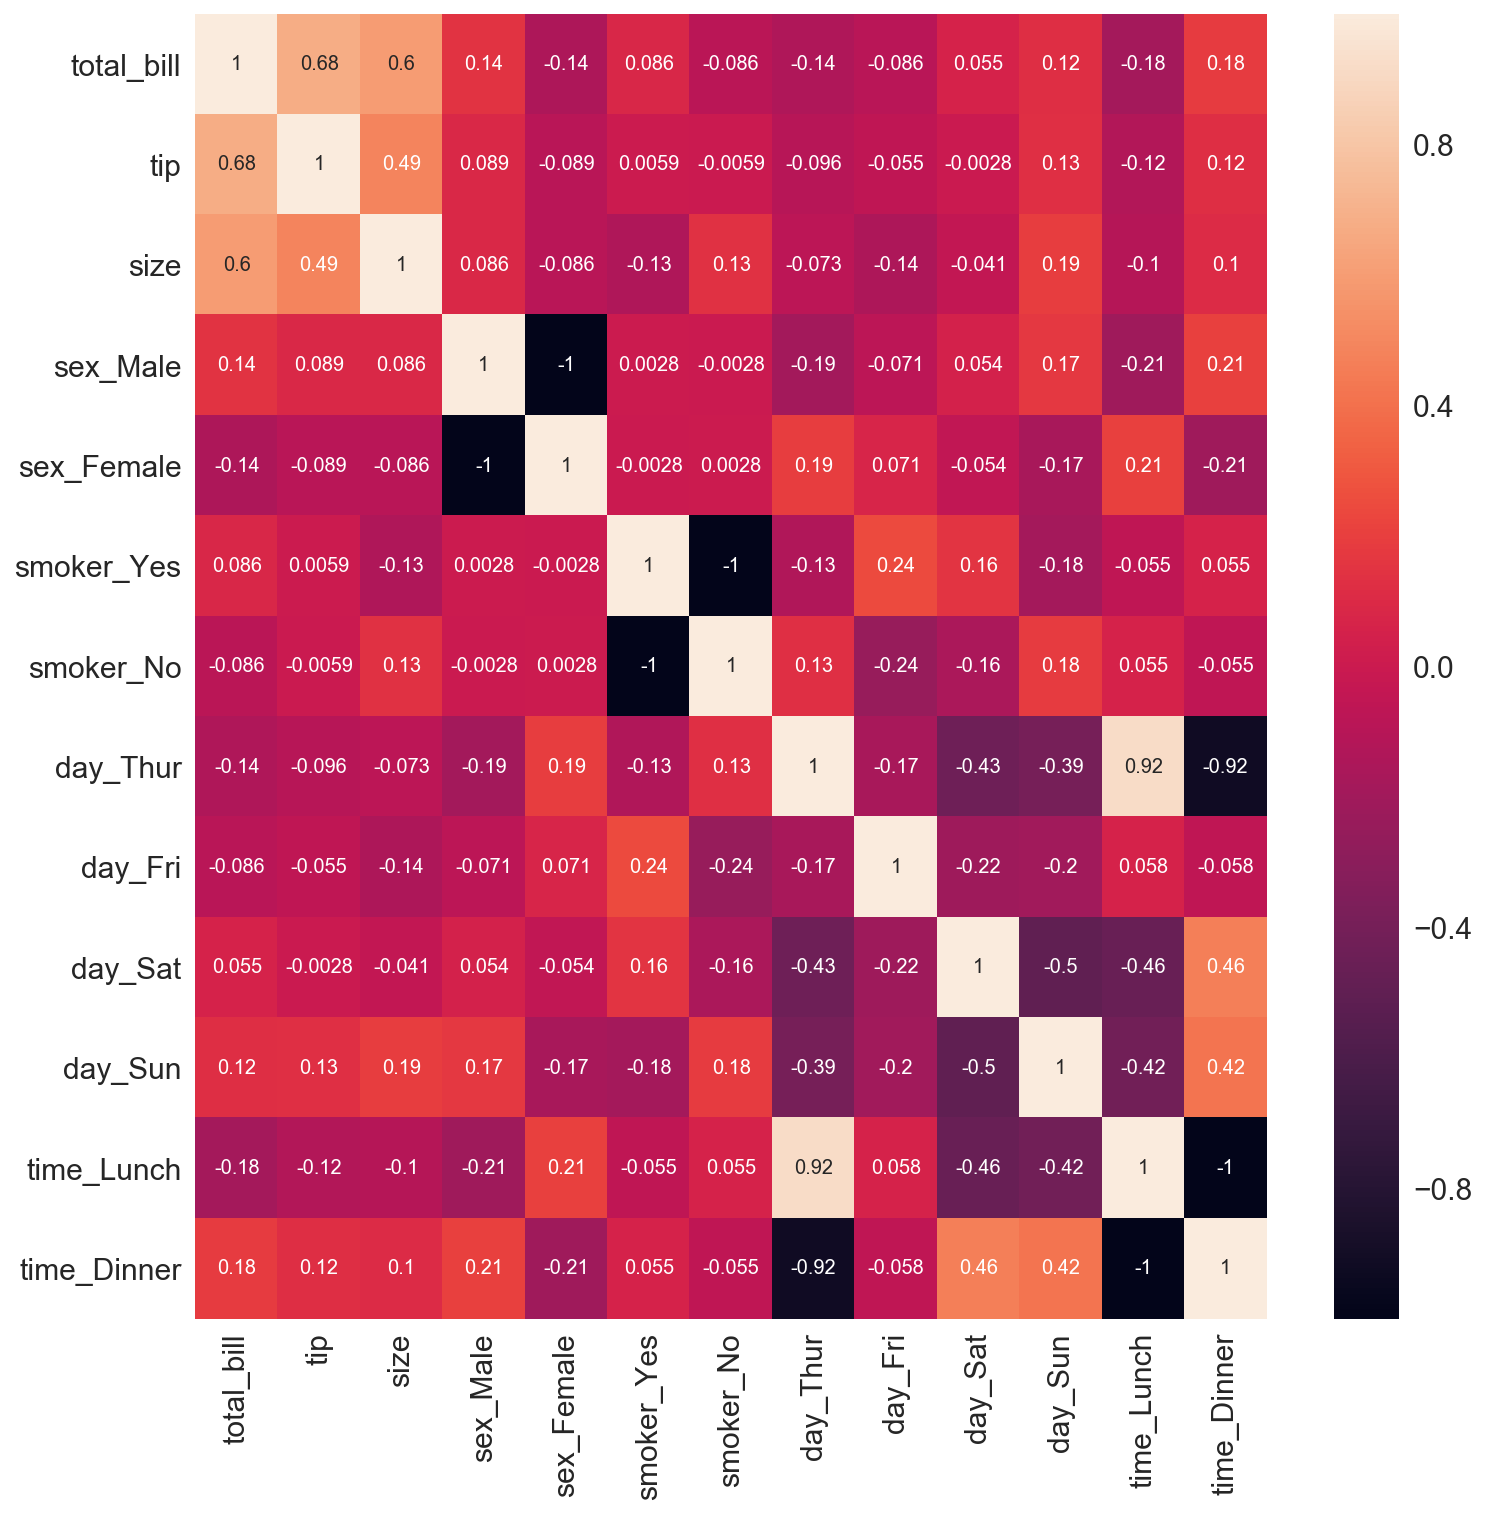

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(tips_dum.corr(),annot=True,ax=ax)
plt.show()

In [8]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


### Fit the model

Now we fit the model. We use rescaling to be able to apply regularized regression. Rescaling can be applied to dummified variables. The result will be that the possible values 0 and 1 are translated into one positive and one negative number.

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Choose outcome and predictor variables

In [10]:
y = tips_dum.pop('tip')
X = tips_dum

#### Create train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [12]:
scaler = StandardScaler()

In [13]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

#### Linear regression model

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401897773914
0.48758172543493583


In [15]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.721351
1,size,0.234427
2,sex_Male,-0.011611
3,sex_Female,0.011611
4,smoker_Yes,-0.036140
5,smoker_No,0.036140
6,day_Thur,-0.128475
7,day_Fri,0.032704
8,day_Sat,0.057806
9,day_Sun,0.046421


#### Lasso model

If we do not drop the redundant columns, the Lasso reduces them to zero even with mild regularization strength. Usually it is much better to avoid having redundant variables (you would not have very much control which one is driven to zero and it can lead to many further problems).

In [16]:
model = Lasso(alpha=10**(-6),max_iter=100000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401895173056
0.48758348313774114


In [17]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,7.213497e-01
1,size,2.344263e-01
2,sex_Male,-2.322101e-02
3,sex_Female,6.316922e-16
4,smoker_Yes,-7.227863e-02
5,smoker_No,0.000000e+00
6,day_Thur,-1.720965e-01
7,day_Fri,8.234692e-03
8,day_Sat,1.192602e-02
9,day_Sun,-0.000000e+00


### Drop redundant variables

We can avoid having redundant variables by indicating `drop_first=True`.
This is really important because otherwise we might end up with 
problems in our regression models.

In [18]:
tips_dum = pd.get_dummies(tips,drop_first=True)
tips_dum.head()
y = tips_dum.pop('tip')
X = tips_dum
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### Fit the model

#### Create train-test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [20]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

#### Linear regression model

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.4415940189777392
0.4875817254349357


In [22]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.721351
1,size,0.234427
2,sex_Female,0.023222
3,smoker_No,0.072280
4,day_Fri,0.104739
5,day_Sat,0.192855
6,day_Sun,0.183069
7,time_Dinner,-0.207138


#### Lasso model

In [23]:
model = Lasso(alpha=10**(-3),max_iter=100000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44148291351093355
0.49076665123473806


In [24]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.719425
1,size,0.234296
2,sex_Female,0.022580
3,smoker_No,0.070644
4,day_Fri,0.082932
5,day_Sat,0.137620
6,day_Sun,0.127626
7,time_Dinner,-0.156189


### Interpret the model coefficients of dummy variables

The model coefficients of categorical predictors can be interpreted in the following way.

Our model will contain a contribution to the outcome variable like

$$
\beta_{\rm smoker\_No}\ x_{\rm smoker\_no} \approx 0.07\ x_{\rm smoker\_no}
$$

We can have either $x_{\rm smoker\_no}=0$ or $x_{\rm smoker\_no}=1$. Only in the second case there will be a contribution. 

> The tip, i.e. the outcome variable $y$, will be 0.07 $ higher for non-smokers than for smokers.

## Dummy practice

Now practice dummifying on the autostats dataset.

- Decide which columns should be dummified.
- Use continuous as well as dummified variables to predict `mpg` with linear regression or the Lasso.
- Don't forget to remove missing values (which might not be encoded properly as `NaN`.
- It won't make sense to create as many dummy variables as observations. 
    - Rather try to create categories, for example the car brand. 
    - Note that there are some spelling mistakes in the car brand names. 
    - To extract the brand names, remember the `.map` function, the `.split` function for strings and panda's `.replace` function to replace entries in a dataframe column.

In [25]:
df = pd.read_csv('../../../../resource-datasets/auto_stats/Auto.csv')

In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Chose columns for dummifying

In [27]:
df.cylinders.value_counts()

4    203
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [28]:
df.origin.value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [29]:
# Extract brands
replace_dict = {'chevroelt':'chevrolet',
                'chevy':'chevrolet',
                'mercedes-benz':'mercedes',
                'toyouta':'toyota',
                'maxda':'mazda',
               'vw':'volkswagen',
               'vokswagen':'volkswagen'}
df['name'] = df.name.map(lambda x: x.split(' ')[0]).replace(replace_dict)

In [30]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


In [31]:
# Dummify
df = pd.get_dummies(df,columns=['cylinders','name','origin'],drop_first=True)

In [32]:
# drop missing values
df.replace({'?':np.nan},inplace=True)

In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(392, 41)

### Fit the model

In [35]:
X = df.copy()
y = X.pop('mpg')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_, model.intercept_)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

[ 1.25192029e+00 -1.41786848e+00 -4.82309154e+00  9.56589191e-02
  2.55327860e+00  4.32017834e+00  9.40641324e-01  2.33706893e+00
  3.75968178e+00 -4.97863377e+12 -2.04900333e+12  2.58177393e-01
  2.08980524e-01  1.71096001e-02  8.64722995e-02 -1.53585645e-01
  6.08156814e+12  1.06309448e-01 -4.97863377e+12 -1.31527738e-01
  1.33443748e-01  4.48438930e+12  4.94134384e+12 -3.53758466e+12
 -2.39447495e-02  1.51433708e+12  4.93366994e-02 -4.07825712e+12
 -5.36877374e+12  5.93353800e-01  5.01801805e-01 -2.89308078e+12
 -4.07825712e+12  3.01407806e+12  6.85966798e+12 -2.04900333e+12
 -8.45303425e+12 -4.55224606e+12  1.40127308e+13 -1.08226826e+13] 23.405451838438694
0.8659316051047142
0.8293567377001956


In [37]:
model = Lasso(alpha=10**(-3),max_iter=100000)
model.fit(X_train,y_train)
print(pd.DataFrame(list(zip(X_train.columns,np.around(model.coef_,3))))) 
print(model.intercept_)
print()
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

                  0      1
0      displacement  1.229
1        horsepower -1.408
2            weight -4.812
3      acceleration  0.097
4              year  2.552
5       cylinders_4  4.248
6       cylinders_5  0.928
7       cylinders_6  2.274
8       cylinders_8  3.695
9         name_audi -0.000
10         name_bmw -0.240
11       name_buick  0.249
12    name_cadillac  0.209
13       name_capri  0.015
14   name_chevrolet  0.076
15    name_chrysler -0.157
16      name_datsun  0.444
17       name_dodge  0.101
18        name_fiat  0.237
19        name_ford -0.144
20          name_hi  0.134
21       name_honda  0.209
22       name_mazda  0.542
23    name_mercedes  0.153
24     name_mercury -0.029
25      name_nissan  0.161
26  name_oldsmobile  0.045
27        name_opel -0.100
28     name_peugeot  0.157
29    name_plymouth  0.589
30     name_pontiac  0.492
31     name_renault  0.119
32        name_saab  0.031
33      name_subaru -0.031
34      name_toyota -0.000
35     name_triumph  0.319
3

In [38]:
from sklearn.linear_model import LassoCV

In [39]:
model = LassoCV(n_alphas=20)
model.fit(X_train,y_train)

print(pd.DataFrame(list(zip(X_train.columns,np.around(model.coef_,3))))) 
print()
print(model.alpha_)
print(model.intercept_)
print()
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

                  0      1
0      displacement -0.000
1        horsepower -1.018
2            weight -3.502
3      acceleration  0.000
4              year  2.408
5       cylinders_4  0.843
6       cylinders_5  0.100
7       cylinders_6 -0.634
8       cylinders_8  0.000
9         name_audi  0.000
10         name_bmw -0.107
11       name_buick  0.000
12    name_cadillac  0.027
13       name_capri -0.000
14   name_chevrolet -0.043
15    name_chrysler -0.081
16      name_datsun  0.249
17       name_dodge -0.000
18        name_fiat  0.102
19        name_ford -0.292
20          name_hi  0.000
21       name_honda  0.093
22       name_mazda  0.000
23    name_mercedes  0.000
24     name_mercury -0.000
25      name_nissan  0.007
26  name_oldsmobile -0.000
27        name_opel -0.000
28     name_peugeot  0.000
29    name_plymouth  0.175
30     name_pontiac  0.145
31     name_renault  0.000
32        name_saab -0.000
33      name_subaru -0.000
34      name_toyota -0.000
35     name_triumph  0.154
3